In [1]:
ls ./data/

data_source.txt  Dig-MNIST.csv  sample_submission.csv  test.csv  train.csv


In [2]:
import pandas as pd

train_df = pd.read_csv('./data/train.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = train_df.values[:, 1:]
y = train_df.values[:, 0]

In [4]:
print(X.shape, y.shape)

(60000, 784) (60000,)


In [5]:
import tensorflow as tf

print(tf.__version__)

2.0.0


## reshaping of the data
The Convolution2D layers in Keras however, are designed to work with 3 dimensions per example. They have 4-dimensional inputs and outputs. This covers colour images (nb_samples, nb_channels, width, height) [full answer from stackoverflow](https://stackoverflow.com/questions/25692293/inserting-a-link-to-a-webpage-in-an-ipython-notebook)

In [6]:
import numpy as np

X = X.reshape(X.shape[0], 28, 28, 1)
print(X.shape)

(60000, 28, 28, 1)


## display of sample images

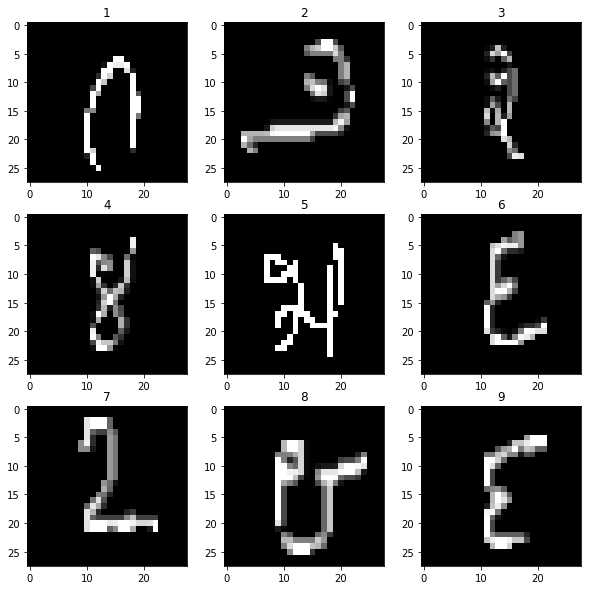

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))

for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(y[i])

In [8]:
# for use with categorical_crossentropy
print('total number of classes = ', train_df.label.nunique())
Y = tf.keras.utils.to_categorical(y, num_classes=10)

total number of classes =  10


## scaling of image pixles

In [9]:
X = X / 255.

## splitting data into train and test set

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(54000, 28, 28, 1)
(6000, 28, 28, 1)
(54000, 10)
(6000, 10)


## CNN
[Why Conv2D?](https://datascience.stackexchange.com/questions/51470/what-are-the-differences-between-convolutional1d-convolutional2d-and-convoluti)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1638912   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 68s 1ms/sample - loss: 0.0700 - accuracy: 0.9784 - val_loss: 0.0350 - val_accuracy: 0.9903
Epoch 2/5
54000/54000 [==============================] - 66s 1ms/sample - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.0221 - val_accuracy: 0.9935
Epoch 3/5
54000/54000 [==============================] - 72s 1ms/sample - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.0173 - val_accuracy: 0.9942
Epoch 4/5
54000/54000 [==============================] - 64s 1ms/sample - loss: 0.0114 - accuracy: 0.9965 - val_loss: 0.0215 - val_accuracy: 0.9928
Epoch 5/5
54000/54000 [==============================] - 69s 1ms/sample - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.0388 - val_accuracy: 0.9892


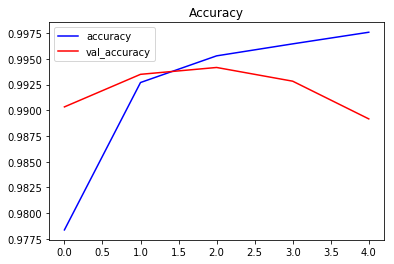

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='accuracy')
plt.plot(epochs, val_accuracy, 'r', label='val_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [16]:
model.predict_classes(X_test[100].reshape(1, 28, 28, 1))

array([7])

In [17]:
model.predict(X_test[100].reshape(1, 28, 28, 1))

array([[2.8289991e-14, 1.0350823e-11, 8.3541091e-10, 2.1312009e-10,
        1.1528162e-15, 9.4559289e-13, 2.8817900e-07, 9.9999976e-01,
        7.8119926e-15, 3.4097555e-11]], dtype=float32)

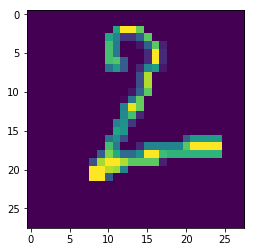

In [18]:
plt.imshow(X_test[100].reshape(28, 28))